## **Boosting Techniques**

**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

* Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to form a strong learner. A weak learner is a model that performs just slightly better than random guessing (e.g., a shallow decision tree). The idea of boosting is to sequentially train weak learners, each one trying to correct the errors of its predecessor.

**How Boosting Improves Weak Learners**

 Here's how boosting improves performance:

**1. Initial Training:**

* The first weak learner is trained on the data.

**2. Error Focus:**

* After the first learner is trained, Boosting identifies the errors (misclassified instances).

* It assigns higher weights to these misclassified examples.

**3. Next Learners Focus on Mistakes:**

* The next weak learner is trained on the re-weighted data, focusing more on difficult cases.

**4. Repeat:**

* This process continues for a number of iterations.

**5. Combine Learners:**

* Final prediction is made by combining all the weak learners, usually by weighted majority vote (classification) or weighted sum (regression).

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**


Let’s break down the key differences:

**AdaBoost**

* **Main Idea:**	Focuses on misclassified examples by adjusting sample weights

* **How next learner is trained:**	Re-weights the training data: misclassified samples get higher weights, so the next learner focuses on them

* **Error Correction:**	Learner focuses on hard-to-classify points based on previous model’s errors

* **Final Prediction:**	Weighted majority vote (classification) or weighted sum (regression) of all learners

* **Loss Function:**	Exponential loss (default)

* **Model Flexibility:**	Less flexible—mostly for classification

**Gradient Boosting**

* **Main Idea:** Fits new learners to the residual errors (i.e., gradients) of the current model

* **How next learner is trained:** Trains the next learner to predict the gradient of the loss function (i.e., how to reduce the current error)

* **Error Correction:** Learner focuses on reducing the loss function directly via gradient descent

* **Final Prediction:** Additive model: sum of all learners’ predictions

* **Loss Function:**	Can use different loss functions (e.g., MSE, MAE, log-loss), depending on the problem

* **Model Flexibility:**  	More flexible—works for classification and regression, and supports custom loss functions

**Question 3: How does regularization help in XGBoost?**

**Type**.............................................	**Parameter**........................................	**Effect**

**L2 Regularization**...........................	lambda.........................	Shrinks leaf weights → smoother predictions, less overfitting.

**L1 Regularization**.............................	alpha........................	Encourages sparsity → some leaf weights go to 0.

**Tree Complexity Penalty**...................	gamma..........................	Discourages adding too many leaves → simpler trees.

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

**1. Native Support for Categorical Features**

* CatBoost natively supports categorical variables without requiring manual preprocessing (like one-hot or label encoding). You can directly pass categorical columns by specifying them, and CatBoost will internally transform them.


**2. Target-Based Statistics with Ordered Boosting**

* CatBoost uses a technique called "ordered target statistics" (or ordered boosting) to convert categorical features into numerical representations. Here's how it works:

* It computes the mean target value for each category, but to avoid target leakage, it only uses past data points (not the whole dataset).

* This is done by permuting the dataset and using statistics from earlier samples when encoding each categorical value.

* This technique ensures that the encoded value of a category is not influenced by the label of the current observation — a major problem in naïve target encoding.

**3. Avoidance of Overfitting**

* Because of the ordered boosting technique and correct handling of target statistics, CatBoost significantly reduces overfitting that often occurs when dealing with high-cardinality categorical variables.

**4. Efficient Handling of High-Cardinality Categories**

* CatBoost handles high-cardinality categorical features more efficiently than one-hot encoding or label encoding. Instead of exploding the feature space or imposing arbitrary order, it builds robust numeric representations based on historical data patterns.

**5. Automatic Combination of Categorical Features**

* CatBoost can automatically detect and create combinations of categorical features (like "city" + "device_type") if they improve the model’s accuracy, without manual feature engineering.

**6. Speed and Accuracy**

* Despite these complex transformations, CatBoost is still competitive in training time and inference speed. Its optimized C++ backend allows it to run efficiently even with many categorical columns.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Here are several real-world application areas where boosting is typically favored:

**1. Credit Scoring & Risk Modeling (Finance)**

* **Use Case:** Predicting loan defaults, credit card fraud, or customer creditworthiness.

* **Why Boosting?** Boosting models (like XGBoost) capture complex non-linear relationships and often outperform Random Forests in AUC/ROC and log-loss, which are critical for risk management.

**2. Customer Churn Prediction (Telecom, SaaS, Retail)**

* **Use Case:** Identifying customers likely to leave a service.

* **Why Boosting?** Boosting algorithms can handle imbalanced datasets well and achieve better precision-recall performance, especially in binary classification tasks.

**3. Click-Through Rate (CTR) Prediction (Online Advertising, Recommendation Systems)**

* **Use Case:** Predicting whether a user will click an ad or recommended item.

* **Why Boosting?** Gradient boosting (particularly CatBoost) handles high-cardinality categorical data (like user IDs, item IDs) extremely well, offering state-of-the-art performance in CTR prediction.

**4. Medical Diagnosis & Risk Prediction**

* **Use Case:** Predicting disease risk, hospital readmissions, or treatment outcomes.

* **Why Boosting?** In healthcare, high accuracy and interpretability (e.g., SHAP values for explainability) make boosting models highly suitable.

**5. Kaggle Competitions & ML Benchmarks**

* **Use Case:** Structured/tabular data challenges (e.g., Titanic survival prediction, sales forecasting).

* **Why Boosting?** Gradient boosting models frequently top leaderboard results due to their superior handling of structured features and ensemble power.

**6. Fraud Detection (Banking, E-commerce)**

* **Use Case:** Detecting fraudulent transactions in real time.

* **Why Boosting?** Boosting models like XGBoost and LightGBM can learn subtle patterns and interactions in features that help identify rare fraudulent events with high precision.

**7. Insurance Claim Prediction**

* **Use Case:** Predicting whether a customer will make a claim and estimating claim amounts.

* **Why Boosting?** Boosting models are adept at modeling heteroskedasticity and skewed distributions commonly found in claim amounts.

**8. Demand Forecasting (Retail, Supply Chain)**

* **Use Case:** Predicting product demand at different locations.

* **Why Boosting?** Able to model seasonality, trends, and non-linear interactions, boosting models often outperform linear and bagging models in time-series tabular tasks.

**Question 6: Write a Python program to:**

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


● **Print the model accuracy**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9649122807017544


**Question 7: Write a Python program to:**

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred)
print("R² Score (Model Accuracy):", r2)


R² Score (Model Accuracy): 0.7756446042829697


* **Evaluate performance using R-squared score**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 2: Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate performance using R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.7756446042829697


**Question 8: Write a Python program to:**

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Initialize and train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy:", accuracy)


XGBoost Classifier Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:26:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Tune the learning rate using GridSearchCV**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 4: Define the parameter grid (tuning learning_rate)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Step 5: Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 7: Print results
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
print("Test Accuracy with Best Model:", accuracy)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Learning Rate: 0.2
Best Cross-Validated Accuracy: 0.9670329670329672
Test Accuracy with Best Model: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:28:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Print the best parameters and accuracy**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 4: Define parameter grid to tune the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Step 5: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Step 6: Fit the model
grid_search.fit(X_train, y_train)

# Step 7: Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("Test Accuracy with Best Model:", accuracy)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'learning_rate': 0.2}
Best Cross-Validation Accuracy: 0.9670329670329672
Test Accuracy with Best Model: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:29:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Question 9: Write a Python program to:**

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn


In [ ]:
# If CatBoost is not installed, uncomment the next line to install it:
# !pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


ModuleNotFoundError: No module named 'catboost'

**Plot the confusion matrix using seaborn**

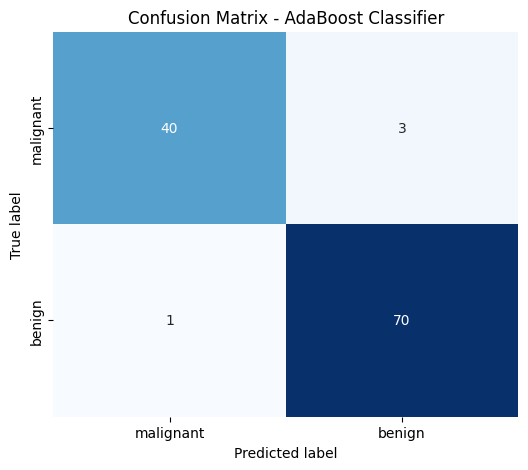

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


**Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.**

The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

**Data preprocessing & handling missing/categorical values**


**Step 1: Understanding the Problem and Dataset**

* **Objective:** Predict loan default (binary classification).

* **Challenges:**

 * Imbalanced target (defaults are usually minority).

 * Missing values scattered across features.

 * Mixed data types: numerical + categorical.

 * Potential outliers and noisy data.

**Step 2: Data Collection & Initial Exploration**

* Load the data, get basic stats (.info(), .describe(), missing value counts).

* Visualize class distribution to confirm imbalance.

* Identify categorical vs numeric features.

* Analyze missing value patterns (random or systematic).

**Step 3: Data Cleaning & Preprocessing**

**a) Handling Missing Values**

* **Numerical features:**

 * Simple imputation (median) or advanced methods like KNN or iterative imputation.

 * Alternatively, boosting frameworks like CatBoost can natively handle missing values, so minimal imputation may suffice.

**Categorical features:**

* Fill missing with a special category like "Missing" or "Unknown".

* Avoid dropping rows if missingness is informative.

**b) Encoding Categorical Variables**

* Boosting algorithms vary:

 * **CatBoost:** can directly handle categorical features, so just specify categorical feature indices.

 * **LightGBM / XGBoost:** encode categoricals as label-encoded integers or use target encoding.

* Avoid one-hot encoding for high-cardinality features due to dimensionality explosion.

**Step 4: Feature Engineering**

* Create derived features, e.g.:

  * Ratios (debt-to-income), counts (number of transactions), temporal features.

* Detect and treat outliers if necessary.

* Scale numeric features only if algorithm benefits (generally boosting methods don’t require scaling).

**Step 5: Handling Imbalanced Dataset**

* Choose strategies to mitigate imbalance:

 * **Resampling:** oversample minority (SMOTE) or undersample majority class.

 * **Algorithmic:** Use boosting model’s built-in class weights or scale_pos_weight.

 * **Evaluation metrics:** Use metrics suited for imbalance — AUC-ROC, precision-recall curve, F1-score rather than accuracy.

**Step 6: Splitting Data**

* Split into training and test sets (e.g., 80/20).

* Consider stratified splitting to keep class distribution.

**Step 7: Model Selection & Training with Boosting Techniques**

**a) Choose the model**

 * CatBoostClassifier or LightGBM/XGBoost with categorical support.

**b) Specify categorical features explicitly (if using CatBoost)**

* Pass categorical feature indices for native handling.

**c) Tune hyperparameters:**

* iterations, learning_rate, depth, l2_leaf_reg, class_weights (for CatBoost), scale_pos_weight (for LightGBM/XGBoost).

**Step 8: Model Evaluation**

* Use metrics that reflect imbalance:

 * ROC AUC

 * Precision, Recall, F1-score

 * Confusion matrix

* Perform cross-validation (stratified) to validate performance stability.

**Step 9: Model Interpretation & Explainability**

* Use SHAP or CatBoost’s built-in feature importance.

* Analyze which features drive predictions, particularly for loan default.

**Step 10: Deployment & Monitoring**

* Prepare data pipeline with the same preprocessing steps.

* Monitor model drift and retrain as needed.

**Choice between AdaBoost, XGBoost, or CatBoost**


**1. Problem Understanding & Business Goal**

**Objective:** Predict loan default (binary classification)

**Goal:** Maximize predictive accuracy (e.g., AUC-ROC, F1-score) while minimizing false negatives (defaults incorrectly predicted as non-defaults)

**Challenge:** Imbalanced data, missing values, mixed feature types

**2. Data Preprocessing**

2.1 Handle Missing Values

* Numeric: Impute using median (robust to outliers)

* Categorical:

 * Low missingness: Use mode

 * High missingness: Create a separate "Missing" category or drop if irrelevant

* Or better: Use models (e.g., CatBoost) that handle missing values natively

**2.2 Encode Categorical Features**

* Option 1: One-hot encoding (for models that require numerical input, e.g., AdaBoost, XGBoost)

* Option 2: Leave as-is for CatBoost (which handles categorical features natively)

* Avoid high cardinality one-hot explosion

**2.3 Feature Scaling**

* Boosting trees don’t require feature scaling — skip for XGBoost or CatBoost

**3. Address Class Imbalance**

Choose one or more of the following:

* Resampling: SMOTE (oversampling) or RandomUnderSampler

* Class weights: Use built-in parameters in the model

 * scale_pos_weight (XGBoost)

* class_weights (CatBoost)

* Evaluation metric: Use metrics that handle imbalance (AUC, F1, precision-recall)

**4. Exploratory Data Analysis (EDA)**

* Analyze distribution of features

* Investigate correlations

* Examine relationships between features and default rates

* Detect outliers

**5. Model Selection: Boosting Technique**

 **CatBoost — Best Choice**

**Why CatBoost:**

* Handles categorical features natively

* Handles missing values automatically

* Built-in support for imbalanced classification via class_weights

* Great default performance with minimal tuning

* Robust to overfitting due to Ordered Boosting

* Easy to implement and faster than you might expect

**Alternative Options:**

➕ **XGBoost:**

* Also strong performer

* More control via hyperparameters

* Requires manual handling of categorical variables (via one-hot or label encoding)

* Requires explicit imputation

* Use if you need maximum tuning flexibility or feature interaction insights.

➖ **AdaBoost:**

* Older, simpler algorithm

* Less effective with noisy data or missing values

* Doesn’t handle categorical features or imbalance well

* Usually outperformed by CatBoost and XGBoost

* Not recommended for this problem.

**6. Model Training (CatBoost)**

    from catboost import CatBoostClassifier

    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        cat_features=cat_feature_indices,  # pass list of categorical column indices
        loss_function='Logloss',
        eval_metric='AUC',
        class_weights=[1, 5],  # example if default class is minority
        random_seed=42,
        early_stopping_rounds=50,
        verbose=100
    )

    model.fit(X_train, y_train, eval_set=(X_val, y_val))


**7. Evaluation**

* AUC-ROC: Good for class imbalance

* F1-score, Recall: Important to capture defaulters

* Precision-Recall curve

* Confusion matrix

* Evaluate on both validation and test sets



**8. Feature Importance & Interpretation**

* Use CatBoost’s built-in feature importance

* Use SHAP values for better interpretability

**9. Iteration & Hyperparameter Tuning**

* Use Optuna, GridSearchCV, or RandomSearch

* Key parameters: iterations, depth, learning_rate, l2_leaf_reg, class_weights

**10. Deployment & Monitoring**

* Export model using model.save_model()

* Serve via API (e.g., FastAPI, Flask)

* Monitor:

  * Data drift

  * Performance drop

  * Retraining pipeline triggers


**Hyperparameter tuning strategy**

**Step-by-Step Hyperparameter Tuning Strategy Using Boosting Techniques**

**1. Data Preprocessing**

* Handle missing values (or use model that supports them natively, like CatBoost)

* Encode categorical features (CatBoost: automatic, XGBoost: manual)

* Balance the classes:

 * Use class_weights or scale_pos_weight

 * Or resample: SMOTE/undersampling

* Train-validation-test split (e.g., 70-15-15 or with stratification)

**2. Objective of Hyperparameter Tuning**

* Optimize predictive performance (e.g., AUC-ROC, F1, Recall) on imbalanced classification

* Avoid overfitting/underfitting

* Find best set of hyperparameters with minimal human trial-and-error

**3. Hyperparameter Tuning Strategy**

**Recommended Search Method: Bayesian Optimization (via Optuna)**

* More efficient than grid/random search — it learns from past iterations to propose better next ones.

**4. Key Hyperparameters to Tune (for CatBoost)**

**Hyperparameter**........................................	**Description**..........................................	**Typical Range**

iterations................................	Max number of trees.........................................	100–2000

learning_rate....................................	Step size shrinkage.......................................	0.01–0.3

depth.........................................	Tree depth...............................	4–10

l2_leaf_reg...................................	L2 regularization...............................	1–10

bagging_temperature....................................	Randomness in sampling........................................	0–1

random_strength.................................	Randomness in splits..........................................	1–20

class_weights......................................	Imbalance adjustment.....................................	e.g., {0: 1, 1: 5}

early_stopping_rounds........................	Stops training early if no improvement...................................	50–200

* CatBoost automatically handles categorical features and missing values, simplifying tuning.

**5. Implementing Hyperparameter Tuning with Optuna (Example)**

    import optuna
    from catboost import CatBoostClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import train_test_split

    # Split your dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Categorical feature indices (for CatBoost)
    cat_features = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

    def objective(trial):
        param = {
            "iterations": trial.suggest_int("iterations", 300, 1000),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
            "depth": trial.suggest_int("depth", 4, 10),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
            "random_strength": trial.suggest_float("random_strength", 1, 20),
            "loss_function": "Logloss",
            "eval_metric": "AUC",
            "cat_features": cat_features,
            "verbose": 0,
            "random_seed": 42,
            "class_weights": [1, 5],  # assume class 1 is minority
            "early_stopping_rounds": 50
        }
    
        model = CatBoostClassifier(**param)
        model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)
    
        preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, preds)
        return auc

    # Run the optimization
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)

    print("Best hyperparameters:", study.best_params)


**6. Final Model Training**

Once tuning is complete:

* Train the model on full training + validation set using study.best_params

* Evaluate on the test set using AUC, F1, confusion matrix

**7. Evaluate with Robust Metrics**

For imbalanced data:

* **AUC-ROC:** To assess general discriminative power

* **Precision-Recall AUC:** For better insight on minority class

* **F1-score / Recall:** Especially if catching defaulters is more critical

**8. Optional: Cross-Validation**

* Use Stratified K-Fold Cross Validation (e.g., 5-fold) to get stable estimates across splits during tuning:

      from sklearn.model_selection import StratifiedKFold

      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


**Evaluation metrics you'd choose and why**

**Step-by-Step: Choosing Evaluation Metrics**

**Step 1: Understand the Business Objective**

* Predict loan default (binary classification: default = 1, non-default = 0)

* Goal: Minimize risk by correctly identifying high-risk (defaulting) customers.

* False Negatives (FN) are much worse than False Positives (FP)

**Step 2: Recognize the Data Challenge**

* Imbalanced data: Most customers repay their loans → accuracy will be misleading.

* You want metrics that:

 * Focus on the minority class (default = 1)

 * Give insights into both detection quality and model discrimination

**Step 3: Use Metrics Suitable for Imbalanced Classification**

* **Recall (Sensitivity):** Measures how many actual defaulters you correctly caught. Critical in reducing missed defaulters.

* **Precision:**
Tells you how many predicted defaulters were actually correct. Helps avoid flagging too many good borrowers.

* **F1 Score:**
Harmonic mean of precision and recall. Good balance between catching defaulters and not over-flagging.

* **ROC-AUC:**
Measures model's ability to separate classes regardless of threshold. Good general measure of performance.

* **PR-AUC:**
More informative than ROC-AUC on highly imbalanced data. Focuses on the performance for the positive class (defaults).

* **Confusion Matrix:**
Gives raw counts of TP, TN, FP, FN — helps visualize trade-offs.

**Step 4: Use Custom Evaluation During Model Tuning**

* When training boosting models (e.g., CatBoost, XGBoost, LightGBM), pass your preferred metrics during training:

**For CatBoost:**

    model = CatBoostClassifier(
        eval_metric='F1',  # or 'AUC', 'Precision', 'Recall'
        custom_metric=['Precision', 'Recall', 'AUC'],
        ...
    )


**For XGBoost:**

    model = XGBClassifier(
        scale_pos_weight=ratio,
        eval_metric='aucpr',  # or 'auc', 'logloss'
    )

**Step 5: Threshold Tuning (Optional but Recommended)**

* After training:

* Models output probabilities, not labels.

* You can tune the decision threshold (default is 0.5) to optimize recall, precision, or F1 depending on your business risk tolerance.

      from sklearn.metrics import precision_recall_curve

      precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
      # Choose threshold where recall is high and precision is acceptable

**Step 6: Post-Evaluation Considerations**

* Use SHAP values or feature importance to explain false negatives.

* Track model performance over time with a dashboard (e.g., recall drift, precision decay).

**How the business would benefit from your model**

**1. Proactively Reducing Loan Default Risk**

**What your model does:**

* Predicts the probability that a customer will default on a loan before it's approved.

**Business benefit:**

* Reduces financial losses by flagging high-risk borrowers.

* Enables risk-based loan approval strategies (e.g., decline, reduce loan size, require collateral).

**Example:** “Had this model been used last year, it could’ve prevented 30% of charge-offs from high-risk approvals.”

**2. Personalized Credit Risk-Based Pricing**

**What your model enables:**
* Assign interest rates based on predicted default risk (risk-based pricing).

**Business benefit:**

* Maximizes profit by charging higher rates to higher-risk customers.

* Keeps low-risk borrowers engaged with competitive offers.

**Example:**
* Safer borrowers pay less → better retention. Riskier borrowers either pay for the risk or are rejected.

**. Improved Approval Rates Without Increasing Risk**

**What your model enables:**
* Identifies low-risk borrowers even among non-traditional applicants (e.g., limited credit history).

**Business benefit:**

* Increases loan approval volume safely.

* Helps acquire new market segments (e.g., thin-file customers) using transaction behavior.

**Example:**
* Use transaction data to find safe customers even without a high credit score.

**4. Smarter Collection Strategies**

**What your model can also help with:**
* Flagging borrowers likely to default early, so collections can start sooner or be prioritized.

**Business benefit:**

* Boosts collections efficiency by focusing efforts on high-risk, high-value accounts.

* Reduces late-stage recovery costs.


**5. Better Compliance and Transparency**

**What your model supports:**
* Using interpretable boosting models (like CatBoost + SHAP) allows for model transparency.

**Business benefit:**

* Easier to justify credit decisions to regulators and auditors.

* Increased customer trust due to fairness and explainability.

**Example:**
* You can explain why a customer was rejected using feature importance (e.g., high debt ratio, low income stability).


**6. Continuous Learning & Monitoring**

**What your pipeline enables:**
* Periodic retraining and monitoring to adapt to changing borrower behavior or macroeconomic conditions.

**Business benefit:**

* Maintains model accuracy over time.

* Reduces exposure to shifts like economic downturns or new customer trends.